<a href="https://colab.research.google.com/github/ntjohns1/LearningIsFun/blob/main/Chollet_Reuters_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)




2110848/2110848 [==============================] - 0s 0us/step


# Decode the Reuters data


In [ ]:
word_index = reuters.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key,value) in word_index.items()])
decoded_newswire = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])
print(decoded_newswire)

550378/550378 [==============================] - 0s 0us/step
? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [ ]:
train_labels[10]

3

In [ ]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

# to_categorical is the built-in method for this one-hot encoding function:

In [ ]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

In [ ]:
model.compile(optimizer="rmsprop",
loss="categorical_crossentropy",
metrics=["accuracy"])

In [ ]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val,y_val))

Epoch 1/20
16/16 [==============================] - 2s 91ms/step - loss: 2.6097 - accuracy: 0.5025 - val_loss: 1.7082 - val_accuracy: 0.6360
Epoch 2/20
16/16 [==============================] - 2s 95ms/step - loss: 1.5096 - accuracy: 0.6756 - val_loss: 1.3898 - val_accuracy: 0.6870
Epoch 3/20
16/16 [==============================] - 1s 89ms/step - loss: 1.1960 - accuracy: 0.7270 - val_loss: 1.2181 - val_accuracy: 0.7180
Epoch 4/20
16/16 [==============================] - 1s 54ms/step - loss: 0.9918 - accuracy: 0.7740 - val_loss: 1.0987 - val_accuracy: 0.7570
Epoch 5/20
16/16 [==============================] - 1s 57ms/step - loss: 0.8243 - accuracy: 0.8165 - val_loss: 1.0313 - val_accuracy: 0.7820
Epoch 6/20
16/16 [==============================] - 1s 57ms/step - loss: 0.6719 - accuracy: 0.8493 - val_loss: 0.9853 - val_accuracy: 0.7920
Epoch 7/20
16/16 [==============================] - 1s 59ms/step - loss: 0.5527 - accuracy: 0.8785 - val_loss: 0.9506 - val_accuracy: 0.8020
Epoch 8/20
16

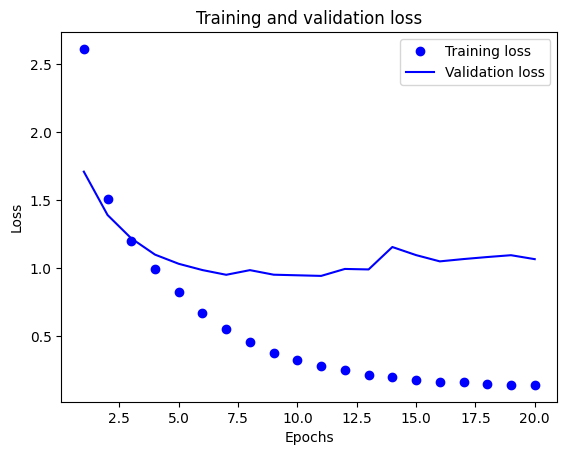

In [ ]:
import matplotlib.pyplot as plt

loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

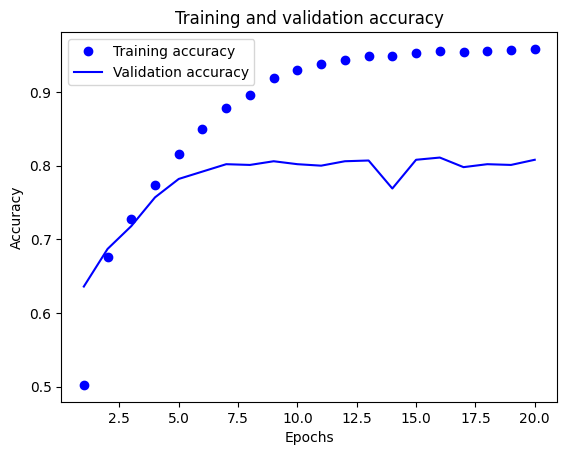

In [ ]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

"As you can see, the training loss decreases with every epoch, and the training accuracy
increases with every epoch. That’s what you would expect when running gradientdescent
optimization—the quantity you’re trying to minimize should be less with
every iteration. But that isn’t the case for the validation loss and accuracy: they seem to
peak at the fourth epoch. This is an example of what we warned against earlier: a
model that performs better on the training data isn’t necessarily a model that will
do better on data it has never seen before. **In precise terms, what you’re seeing is
overfitting: after the fourth epoch, you’re overoptimizing on the training data, and you
end up learning representations that are specific to the training data and don’t generalize
to data outside of the training set."**
-Chollet pg 104

# Retrain the Model From Scratch

In [ ]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 [==============================] - 2s 54ms/step - loss: 2.6201 - accuracy: 0.4940
Epoch 2/9
18/18 [==============================] - 1s 50ms/step - loss: 1.4637 - accuracy: 0.6870
Epoch 3/9
18/18 [==============================] - 1s 48ms/step - loss: 1.1217 - accuracy: 0.7537
Epoch 4/9
18/18 [==============================] - 1s 51ms/step - loss: 0.9091 - accuracy: 0.8005
Epoch 5/9
18/18 [==============================] - 1s 52ms/step - loss: 0.7488 - accuracy: 0.8372
Epoch 6/9
18/18 [==============================] - 1s 50ms/step - loss: 0.6212 - accuracy: 0.8664
Epoch 7/9
18/18 [==============================] - 1s 48ms/step - loss: 0.5170 - accuracy: 0.8916
Epoch 8/9
18/18 [==============================] - 1s 81ms/step - loss: 0.4395 - accuracy: 0.9040
Epoch 9/9
71/71 [==============================] - 0s 4ms/step - loss: 0.8910 - accuracy: 0.7961


In [ ]:
results

[0.9336729049682617, 0.7947462201118469]

In [ ]:
predictions = model.predict(x_test)

71/71 [==============================] - 0s 4ms/step


In [ ]:
np.sum(predictions[0])

0.9999999

In [ ]:
np.argmax(predictions[0])

3